In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
pd.set_option('display.max_rows', 500)
pd.set_option('display.show_dimensions', True)
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.simplefilter('ignore')

In [16]:
data_before_imputation = pd.read_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/data_before_imputation_v2.csv')

In [17]:
data_before_imputation.head()

,病歷號,收件日期,收件時間,Temperature,pH,pCO2,pO2,HCO3,TCO2,ABE,SBE,SBC,SAT,Na,K,Mg,Cl,BUN (B),Creatinine(B),mode,peep,fio2,tidal volume,respiratory rate,minute ventilation,spo2
0,114400,20130125,714,37.0,7.267,59.0,459.4,27.1,28.9,-0.6,-0.1,24.0,100.0,141.4,4.71,NaN,NaN,48.1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114400,20130125,1027,37.0,7.281,59.3,94.0,28.1,30.0,0.5,1.1,24.8,96.0,141.4,4.71,NaN,NaN,48.1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114400,20130125,1250,37.0,7.287,54.0,136.5,26.0,27.6,-1.1,-0.9,23.5,98.7,141.4,4.71,NaN,NaN,48.1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114400,20130126,959,37.0,7.183,81.7,53.2,31.0,33.5,0.6,2.4,24.4,76.3,NaN,NaN,NaN,NaN,NaN,NaN,BIPAP+PS,8.0,50.0,414.0,14.0,6.0,99.0
4,114400,20130327,128,37.0,7.098,178.8,65.3,55.7,61.2,18.5,25.8,42.3,78.2,140.8,3.40,NaN,NaN,50.8,2.49,PCV,8.0,80.0,451.0,18.0,8.2,98.0


In [18]:
data_before_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   病歷號                 1292 non-null   int64  
 1   收件日期                1292 non-null   int64  
 2   收件時間                1292 non-null   int64  
 3   Temperature         1292 non-null   float64
 4   pH                  1292 non-null   float64
 5   pCO2                1292 non-null   float64
 6   pO2                 1292 non-null   float64
 7   HCO3                1292 non-null   float64
 8   TCO2                1291 non-null   float64
 9   ABE                 1292 non-null   float64
 10  SBE                 1292 non-null   float64
 11  SBC                 1292 non-null   float64
 12  SAT                 1292 non-null   float64
 13  Na                  682 non-null    float64
 14  K                   733 non-null    float64
 15  Mg                  107 non-null    float64
 16  Cl    

In [19]:
data_before_imputation_describe = data_before_imputation.describe().T
data_before_imputation_describe

,count,mean,std,min,25%,50%,75%,max
病歷號,1292.0,7.486876e+07,3.447042e+07,1.144000e+05,9.203562e+07,9.225967e+07,9.244060e+07,9.930224e+07
收件日期,1292.0,2.012966e+07,6.121919e+03,2.012043e+07,2.012122e+07,2.013062e+07,2.013102e+07,2.014061e+07
收件時間,1292.0,1.149834e+03,6.021707e+02,1.000000e+00,7.047500e+02,1.127000e+03,1.602500e+03,2.357000e+03
Temperature,1292.0,3.700000e+01,0.000000e+00,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
pH,1292.0,7.380861e+00,1.219735e-01,6.742000e+00,7.327000e+00,7.407000e+00,7.464000e+00,7.805000e+00
pCO2,1292.0,4.289551e+01,1.970749e+01,7.800000e+00,3.070000e+01,3.820000e+01,4.802500e+01,1.930000e+02
pO2,1292.0,1.254464e+02,9.181474e+01,1.740000e+01,6.610000e+01,9.470000e+01,1.507250e+02,5.787000e+02
HCO3,1292.0,2.424048e+01,6.907559e+00,1.500000e+00,1.980000e+01,2.370000e+01,2.810000e+01,5.630000e+01
TCO2,1291.0,2.552897e+01,7.256808e+00,1.800000e+00,2.090000e+01,2.510000e+01,2.960000e+01,6.120000e+01
ABE,1292.0,-7.039474e-01,6.319363e+00,-3.360000e+01,-4.325000e+00,-6.000000e-01,3.000000e+00,2.290000e+01


In [20]:
data_before_imputation_describe.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/data_before_imputation_describe_v2.csv', encoding='utf-8', index=True)

In [21]:
data_before_imputation_corr = data_before_imputation.corr()
data_before_imputation_corr

,病歷號,收件日期,收件時間,Temperature,pH,pCO2,pO2,HCO3,TCO2,ABE,SBE,SBC,SAT,Na,K,Mg,Cl,BUN (B),Creatinine(B),peep,fio2,tidal volume,respiratory rate,minute ventilation,spo2
病歷號,1.000000,0.013679,0.015780,NaN,0.060017,-0.069606,-0.045167,-0.057396,-0.053218,-0.024629,-0.037572,-0.043067,-0.011258,0.023689,-0.030757,-0.138654,0.237433,-0.127693,-0.071947,-0.076287,-0.088393,0.014863,0.103794,0.023483,0.046458
收件日期,0.013679,1.000000,0.005556,NaN,0.056318,-0.027446,0.013656,0.010496,0.013357,0.027565,0.027818,0.027038,0.014363,0.004003,0.008377,-0.209567,0.166756,0.027290,0.098744,0.003436,-0.065791,-0.048059,-0.059401,-0.006942,-0.034073
收件時間,0.015780,0.005556,1.000000,NaN,-0.076830,-0.009490,0.085929,-0.081984,-0.077100,-0.101692,-0.098751,-0.099374,0.013448,0.012799,0.076342,0.111907,-0.008445,0.055627,0.003402,-0.016927,0.076285,0.032864,-0.007897,0.054268,-0.007283
Temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,0.060017,0.056318,-0.076830,NaN,1.000000,-0.628076,0.040598,0.089389,0.041153,0.517469,0.351819,0.496907,0.292521,-0.024107,-0.333517,-0.246637,0.047769,-0.100313,-0.156605,-0.067206,-0.311967,0.028295,0.011534,-0.066366,0.100721
pCO2,-0.069606,-0.027446,-0.009490,NaN,-0.628076,1.000000,-0.089350,0.660178,0.698844,0.289571,0.452195,0.291858,-0.274302,-0.003376,0.085296,0.049720,-0.221836,-0.110107,-0.100218,0.154876,0.184802,-0.209984,-0.037242,-0.125045,-0.018486
pO2,-0.045167,0.013656,0.085929,NaN,0.040598,-0.089350,1.000000,-0.101357,-0.103009,-0.067436,-0.085171,-0.046205,0.467655,0.041993,-0.000843,-0.038567,-0.019876,0.116043,-0.007347,0.017996,0.134496,0.053587,-0.032083,0.061683,-0.103995
HCO3,-0.057396,0.010496,-0.081984,NaN,0.089389,0.660178,-0.101357,1.000000,0.998074,0.897559,0.963609,0.900478,-0.090571,-0.023069,-0.191739,-0.159833,-0.242607,-0.254357,-0.300022,0.170311,-0.033855,-0.314466,-0.042725,-0.311659,0.091602
TCO2,-0.053218,0.013357,-0.077100,NaN,0.041153,0.698844,-0.103009,0.998074,1.000000,0.870761,0.946402,0.873007,-0.109605,-0.022052,-0.174221,-0.146564,-0.246935,-0.249955,-0.291496,0.171703,-0.017776,-0.313819,-0.043622,-0.308258,0.083349
ABE,-0.024629,0.027565,-0.101692,NaN,0.517469,0.289571,-0.067436,0.897559,0.870761,1.000000,0.981349,0.993008,0.052442,-0.028759,-0.307282,-0.247640,-0.166973,-0.258249,-0.328586,0.116186,-0.172702,-0.259551,-0.033337,-0.304665,0.126718


<AxesSubplot: >

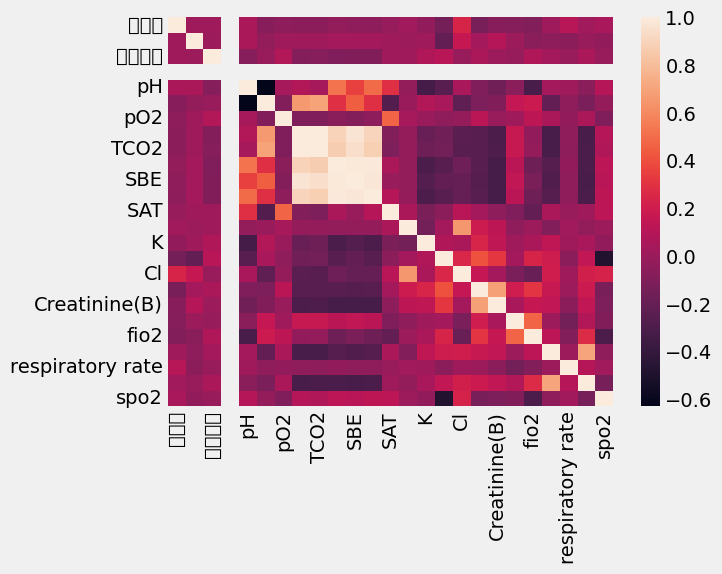

In [22]:
sns.heatmap(data_before_imputation_corr)

In [23]:
data_before_imputation_corr.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/data_before_imputation_corr_v2.csv', encoding='utf-8', index=True)

In [31]:
#data_before_imputation.dropna(subset=['mode', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2'], how='all', inplace=True)
#data_before_imputation.shape

(882, 26)

In [ ]:
data_imputed = data_before_imputation.copy()
data_imputed['Na'] = data_imputed.groupby(['病歷號'])['Na'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['K'] = data_imputed.groupby(['病歷號'])['K'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['Mg'] = data_imputed.groupby(['病歷號'])['Mg'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['Cl'] = data_imputed.groupby(['病歷號'])['Cl'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['BUN (B)'] = data_imputed.groupby(['病歷號'])['BUN (B)'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['Creatinine(B)'] = data_imputed.groupby(['病歷號'])['Creatinine(B)'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['mode'] = data_imputed.groupby(['病歷號'])['mode'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['peep'] = data_imputed.groupby(['病歷號'])['peep'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['fio2'] = data_imputed.groupby(['病歷號'])['fio2'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['tidal volume'] = data_imputed.groupby(['病歷號'])['tidal volume'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['respiratory rate'] = data_imputed.groupby(['病歷號'])['respiratory rate'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['minute ventilation'] = data_imputed.groupby(['病歷號'])['minute ventilation'].transform(lambda x: x.fillna(method='bfill'))
data_imputed['Na'] = data_imputed.groupby(['病歷號'])['Na'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['K'] = data_imputed.groupby(['病歷號'])['K'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['Mg'] = data_imputed.groupby(['病歷號'])['Mg'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['Cl'] = data_imputed.groupby(['病歷號'])['Cl'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['BUN (B)'] = data_imputed.groupby(['病歷號'])['BUN (B)'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['Creatinine(B)'] = data_imputed.groupby(['病歷號'])['Creatinine(B)'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['mode'] = data_imputed.groupby(['病歷號'])['mode'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['peep'] = data_imputed.groupby(['病歷號'])['peep'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['fio2'] = data_imputed.groupby(['病歷號'])['fio2'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['tidal volume'] = data_imputed.groupby(['病歷號'])['tidal volume'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['respiratory rate'] = data_imputed.groupby(['病歷號'])['respiratory rate'].transform(lambda x: x.fillna(method='ffill'))
data_imputed['minute ventilation'] = data_imputed.groupby(['病歷號'])['minute ventilation'].transform(lambda x: x.fillna(method='ffill'))
data_imputed.info()

In [ ]:
data_imputed['Na'].fillna(data_imputed['Na'].mean(), inplace=True)
data_imputed['K'].fillna(data_imputed['K'].mean(), inplace=True)
data_imputed['Mg'].fillna(data_imputed['Mg'].mean(), inplace=True)
data_imputed['Cl'].fillna(data_imputed['Cl'].mean(), inplace=True)
data_imputed['BUN (B)'].fillna(data_imputed['BUN (B)'].mean(), inplace=True)
data_imputed['Creatinine(B)'].fillna(data_imputed['Creatinine(B)'].mean(), inplace=True)
data_imputed['mode'].fillna(data_imputed['mode'].mode()[0], inplace=True)
data_imputed['peep'].fillna(data_imputed['peep'].mean(), inplace=True)
data_imputed['fio2'].fillna(data_imputed['fio2'].mean(), inplace=True)
data_imputed['tidal volume'].fillna(data_imputed['tidal volume'].mean(), inplace=True)
data_imputed['respiratory rate'].fillna(data_imputed['respiratory rate'].mean(), inplace=True)
data_imputed['minute ventilation'].fillna(data_imputed['minute ventilation'].mean(), inplace=True)
data_imputed['spo2'].fillna(data_imputed['spo2'].mean(), inplace=True)
data_imputed.info()

In [ ]:
data_imputed_corr = data_imputed.corr()
data_imputed_corr

In [ ]:
data_imputed_dropna = data_imputed.dropna()
data_imputed_dropna.info()

In [ ]:
data_dropped = data_before_imputation.drop(['Mg', 'Cl', 'mode', 'tidal volume'], axis=1)
data_dropped.info()

In [ ]:
data_dropped = data_dropped.dropna()
data_dropped.info()

In [ ]:
X = data_dropped[['Na', 'K', 'BUN (B)', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_dropped['pH'].copy()

In [ ]:
X = data_imputed_dropna[['K', 'fio2','spo2']].copy()
y = data_imputed_dropna['pH'].copy()

In [ ]:
get_best_model_and_accuracy(lr, lr_params, X, y)

In [ ]:
# X = data_imputed[['Na', 'K', 'Mg', 'Cl', 'BUN (B)', 'Creatinine(B)', 'mode', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['pH'].copy()

In [32]:
X = data_before_imputation[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
# Pick out Na, BUN (B), Mg, peep according to feature_importances
# X = data_before_imputation[['K', 'Cl', 'Creatinine(B)', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_before_imputation['pH'].copy()

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 3 to 1291
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Na                  335 non-null    float64
 1   K                   353 non-null    float64
 2   BUN (B)             261 non-null    float64
 3   Mg                  56 non-null     float64
 4   Cl                  92 non-null     float64
 5   Creatinine(B)       293 non-null    float64
 6   peep                822 non-null    float64
 7   fio2                853 non-null    float64
 8   tidal volume        673 non-null    float64
 9   respiratory rate    822 non-null    float64
 10  minute ventilation  616 non-null    float64
 11  spo2                869 non-null    float64
dtypes: float64(12)
memory usage: 89.6 KB


In [34]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 882 entries, 3 to 1291
Series name: pH
Non-Null Count  Dtype  
--------------  -----  
882 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


In [ ]:
class CustomDummifier(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols)
    
    def fit(self, *_):
        return self

In [ ]:
cd = CustomDummifier(cols=['mode'])

cd.fit_transform(X)

In [ ]:
def get_best_model_and_accuracy(model, params, X, y):
    # model - the model to grid search
    # params - the parameter set to try
    # error_score - if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid = GridSearchCV(model, params, error_score=0.)
    # Fit the model and parameters
    grid.fit(X, y)           
    # Our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # The best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    # The average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # The average time it took a model to predict out of sample data (in seconds)
    # This metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [ ]:
# Import four machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
# Set up some parameters for our grid search
# We will start with four different machine learning models
# logistic regression, KNN, Decision Tree, and Random Forest
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['none', 'l2']}
knn_params = {'n_neighbors': [1, 3, 5, 7]}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}
# hgb_params = {'max_iter': [100, 500, 1000, 1500], 'learning_rate': [0.1], 'max_depth': [25, 50, 75], 'l2_regularization': [0, 1.5]}

In [ ]:
# Instantiate the four machine learning models
linearRegression = LinearRegression()
lr = LogisticRegression()
knn = KNeighborsRegressor()
d_tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
hgb = HistGradientBoostingRegressor()

In [ ]:
# Quick to fit, very slow to predict
get_best_model_and_accuracy(lr, lr_params, X, y)

In [ ]:
# Construct pipeline parameters based on the parameters for KNN on its own
knn_pipe_params = {'regressor__{}'.format(k): v for k, v in knn_params.items()}
print(knn_pipe_params)

# KNN requires a standard scalar due to using Euclidean distance as the main equation for predicting observations
knn_pipe = Pipeline([('scale', StandardScaler()), ('regressor', knn)])

# Quick to fit, very slow to predict
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

In [ ]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
linearRegression.score(X_test, y_test)

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree.score(X_test, y_test)

In [ ]:
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train, y_train)
hgb.score(X_test, y_test)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

Na                    547
K                     529
BUN (B)               621
Mg                    826
Cl                    790
Creatinine(B)         589
peep                   60
fio2                   29
tidal volume          209
respiratory rate       60
minute ventilation    266
spo2                   13
Length: 12, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X_train['mode'] = le.fit_transform(X_train['mode'])
#X_test['mode'] = le.fit_transform(X_test['mode'])
y_train = le.fit_transform(y_train)
#y_test = le.fit_transform(y_test)

In [36]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015, 0.02, 0.05, 0.03, 0.035, 0.04]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=5, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits

[CV 1/5; 174/270] END learning_rate=0.05, max_depth=4, n_estimators=500;, score=-0.059 total time=   1.8s
[CV 5/5; 179/270] START learning_rate=0.05, max_depth=5, n_estimators=300.......
[CV 5/5; 179/270] END learning_rate=0.05, max_depth=5, n_estimators=300;, score=0.190 total time=   1.2s
[CV 1/5; 185/270] START learning_rate=0.03, max_depth=1, n_estimators=300.......
[CV 1/5; 185/270] END learning_rate=0.03, max_depth=1, n_estimators=300;, score=0.115 total time=   0.8s
[CV 3/5; 186/270] START learning_rate=0.03, max_depth=1, n_estimators=500.......
[CV 3/5; 186/270] END learning_rate=0.03, max_depth=1, n_estimators=500;, score=0.091 total time=   1.4s
[CV 5/5; 192/270] START learning_rate=0.03, max_depth=2, n_estimators=500.......
[CV 5/5; 192/270] END learning_rate=0.03, max_depth=2, n_estimators=500;, score=0.197 total time=   1.5s
[CV 1/5; 199/270] START learning_rate=0.03, max_depth=4, n_estimators=10........
[CV 

[CV 5/5; 11/270] END learning_rate=0.5, max_depth=2, n_estimators=300;, score=-0.075 total time=   0.8s
[CV 5/5; 181/270] END learning_rate=0.03, max_depth=1, n_estimators=10;, score=-1318.166 total time=   0.0s
[CV 2/5; 182/270] START learning_rate=0.03, max_depth=1, n_estimators=50........
[CV 2/5; 182/270] END learning_rate=0.03, max_depth=1, n_estimators=50;, score=-153.573 total time=   0.2s
[CV 4/5; 182/270] START learning_rate=0.03, max_depth=1, n_estimators=50........
[CV 4/5; 182/270] END learning_rate=0.03, max_depth=1, n_estimators=50;, score=-165.953 total time=   0.2s
[CV 2/5; 183/270] START learning_rate=0.03, max_depth=1, n_estimators=100.......
[CV 2/5; 183/270] END learning_rate=0.03, max_depth=1, n_estimators=100;, score=-7.154 total time=   0.3s
[CV 5/5; 183/270] START learning_rate=0.03, max_depth=1, n_estimators=100.......
[CV 5/5; 183/270] END learning_rate=0.03, max_depth=1, n_estimators=100;, score=-5.359 total time=   0.3s
[CV 5/5; 184/270] START learning_rate=

[CV 5/5; 20/270] START learning_rate=0.5, max_depth=4, n_estimators=50..........
[CV 4/5; 177/270] START learning_rate=0.05, max_depth=5, n_estimators=100.......
[CV 4/5; 177/270] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.055 total time=   0.4s
[CV 5/5; 178/270] START learning_rate=0.05, max_depth=5, n_estimators=200.......
[CV 5/5; 178/270] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=0.183 total time=   0.8s
[CV 3/5; 180/270] START learning_rate=0.05, max_depth=5, n_estimators=500.......
[CV 3/5; 180/270] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=0.058 total time=   2.1s
[CV 2/5; 187/270] START learning_rate=0.03, max_depth=2, n_estimators=10........
[CV 2/5; 187/270] END learning_rate=0.03, max_depth=2, n_estimators=10;, score=-1760.011 total time=   0.1s
[CV 5/5; 187/270] START learning_rate=0.03, max_depth=2, n_estimators=10........
[CV 5/5; 187/270] END learning_rate=0.03, max_depth=2, n_estimators=10;, score=-1318.166 to

[CV 2/5; 26/270] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=-0.040 total time=   0.2s
[CV 1/5; 196/270] END learning_rate=0.03, max_depth=3, n_estimators=200;, score=0.031 total time=   0.8s
[CV 5/5; 197/270] START learning_rate=0.03, max_depth=3, n_estimators=300.......
[CV 5/5; 197/270] END learning_rate=0.03, max_depth=3, n_estimators=300;, score=0.197 total time=   1.1s
[CV 5/5; 202/270] START learning_rate=0.03, max_depth=4, n_estimators=200.......
[CV 5/5; 202/270] END learning_rate=0.03, max_depth=4, n_estimators=200;, score=0.176 total time=   0.7s
[CV 2/5; 204/270] START learning_rate=0.03, max_depth=4, n_estimators=500.......
[CV 2/5; 204/270] END learning_rate=0.03, max_depth=4, n_estimators=500;, score=0.174 total time=   1.9s
[CV 2/5; 210/270] START learning_rate=0.03, max_depth=5, n_estimators=500.......
[CV 2/5; 210/270] END learning_rate=0.03, max_depth=5, n_estimators=500;, score=0.154 total time=   2.2s
[CV 3/5; 217/270] START learning_rate=0.035, max

[CV 4/5; 43/270] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=-286.951 total time=   0.0s
[CV 2/5; 227/270] END learning_rate=0.035, max_depth=3, n_estimators=300;, score=0.209 total time=   1.0s
[CV 1/5; 231/270] START learning_rate=0.035, max_depth=4, n_estimators=100......
[CV 1/5; 231/270] END learning_rate=0.035, max_depth=4, n_estimators=100;, score=-3.623 total time=   0.3s
[CV 5/5; 231/270] START learning_rate=0.035, max_depth=4, n_estimators=100......
[CV 5/5; 231/270] END learning_rate=0.035, max_depth=4, n_estimators=100;, score=-1.778 total time=   0.3s
[CV 2/5; 233/270] START learning_rate=0.035, max_depth=4, n_estimators=300......
[CV 2/5; 233/270] END learning_rate=0.035, max_depth=4, n_estimators=300;, score=0.181 total time=   1.1s
[CV 4/5; 237/270] START learning_rate=0.035, max_depth=5, n_estimators=100......
[CV 4/5; 237/270] END learning_rate=0.035, max_depth=5, n_estimators=100;, score=-2.582 total time=   0.3s
[CV 3/5; 238/270] START learning_rate=

[CV 5/5; 47/270] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.149 total time=   0.8s
[CV 1/5; 241/270] START learning_rate=0.04, max_depth=1, n_estimators=10........
[CV 1/5; 241/270] END learning_rate=0.04, max_depth=1, n_estimators=10;, score=-1727.407 total time=   0.0s
[CV 3/5; 241/270] START learning_rate=0.04, max_depth=1, n_estimators=10........
[CV 3/5; 241/270] END learning_rate=0.04, max_depth=1, n_estimators=10;, score=-1528.140 total time=   0.0s
[CV 5/5; 241/270] START learning_rate=0.04, max_depth=1, n_estimators=10........
[CV 5/5; 241/270] END learning_rate=0.04, max_depth=1, n_estimators=10;, score=-1071.461 total time=   0.0s
[CV 2/5; 242/270] START learning_rate=0.04, max_depth=1, n_estimators=50........
[CV 2/5; 242/270] END learning_rate=0.04, max_depth=1, n_estimators=50;, score=-54.313 total time=   0.2s
[CV 5/5; 242/270] START learning_rate=0.04, max_depth=1, n_estimators=50........
[CV 5/5; 242/270] END learning_rate=0.04, max_depth=1, n_estim

[CV 4/5; 55/270] START learning_rate=0.1, max_depth=5, n_estimators=10..........
[CV 1/5; 206/270] START learning_rate=0.03, max_depth=5, n_estimators=50........
[CV 1/5; 206/270] END learning_rate=0.03, max_depth=5, n_estimators=50;, score=-188.679 total time=   0.2s
[CV 3/5; 206/270] START learning_rate=0.03, max_depth=5, n_estimators=50........
[CV 3/5; 206/270] END learning_rate=0.03, max_depth=5, n_estimators=50;, score=-164.824 total time=   0.2s
[CV 2/5; 207/270] START learning_rate=0.03, max_depth=5, n_estimators=100.......
[CV 2/5; 207/270] END learning_rate=0.03, max_depth=5, n_estimators=100;, score=-7.222 total time=   0.3s
[CV 2/5; 208/270] START learning_rate=0.03, max_depth=5, n_estimators=200.......
[CV 2/5; 208/270] END learning_rate=0.03, max_depth=5, n_estimators=200;, score=0.165 total time=   1.0s
[CV 5/5; 210/270] START learning_rate=0.03, max_depth=5, n_estimators=500.......
[CV 5/5; 210/270] END learning_rate=0.03, max_depth=5, n_estimators=500;, score=0.199 tot

[CV 4/5; 53/270] END learning_rate=0.1, max_depth=4, n_estimators=300;, score=0.176 total time=   0.9s
[CV 3/5; 247/270] END learning_rate=0.04, max_depth=2, n_estimators=10;, score=-1528.140 total time=   0.0s
[CV 1/5; 248/270] START learning_rate=0.04, max_depth=2, n_estimators=50........
[CV 1/5; 248/270] END learning_rate=0.04, max_depth=2, n_estimators=50;, score=-67.938 total time=   0.2s
[CV 5/5; 248/270] START learning_rate=0.04, max_depth=2, n_estimators=50........
[CV 5/5; 248/270] END learning_rate=0.04, max_depth=2, n_estimators=50;, score=-40.748 total time=   0.2s
[CV 2/5; 250/270] START learning_rate=0.04, max_depth=2, n_estimators=200.......
[CV 2/5; 250/270] END learning_rate=0.04, max_depth=2, n_estimators=200;, score=0.231 total time=   0.6s
[CV 1/5; 252/270] START learning_rate=0.04, max_depth=2, n_estimators=500.......
[CV 1/5; 252/270] END learning_rate=0.04, max_depth=2, n_estimators=500;, score=0.077 total time=   1.5s
[CV 3/5; 257/270] START learning_rate=0.04,

[CV 3/5; 69/270] START learning_rate=0.01, max_depth=2, n_estimators=100........
[CV 5/5; 269/270] START learning_rate=0.04, max_depth=5, n_estimators=300.......
[CV 5/5; 269/270] END learning_rate=0.04, max_depth=5, n_estimators=300;, score=0.200 total time=   0.8s
[CV 5/5; 1/270] START learning_rate=0.5, max_depth=1, n_estimators=10...........
[CV 5/5; 1/270] END learning_rate=0.5, max_depth=1, n_estimators=10;, score=0.136 total time=   0.0s
[CV 4/5; 3/270] START learning_rate=0.5, max_depth=1, n_estimators=100..........
[CV 4/5; 3/270] END learning_rate=0.5, max_depth=1, n_estimators=100;, score=0.146 total time=   0.2s
[CV 5/5; 5/270] START learning_rate=0.5, max_depth=1, n_estimators=300..........
[CV 5/5; 5/270] END learning_rate=0.5, max_depth=1, n_estimators=300;, score=0.063 total time=   0.7s
[CV 1/5; 6/270] START learning_rate=0.5, max_depth=1, n_estimators=500..........
[CV 1/5; 6/270] END learning_rate=0.5, max_depth=1, n_estimators=500;, score=0.146 total time=   1.2s
[C

[CV 1/5; 102/270] START learning_rate=0.015, max_depth=2, n_estimators=500......
[CV 3/5; 26/270] START learning_rate=0.5, max_depth=5, n_estimators=50..........
[CV 3/5; 26/270] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=-0.236 total time=   0.2s
[CV 5/5; 27/270] START learning_rate=0.5, max_depth=5, n_estimators=100.........
[CV 5/5; 27/270] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=-0.258 total time=   0.3s
[CV 1/5; 28/270] START learning_rate=0.5, max_depth=5, n_estimators=200.........
[CV 1/5; 28/270] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=-0.039 total time=   0.6s
[CV 4/5; 30/270] START learning_rate=0.5, max_depth=5, n_estimators=500.........
[CV 4/5; 30/270] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=-0.008 total time=   1.3s
[CV 4/5; 35/270] START learning_rate=0.1, max_depth=1, n_estimators=300.........
[CV 4/5; 35/270] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=0.160 total time=   0

[CV 5/5; 107/270] START learning_rate=0.015, max_depth=3, n_estimators=300......
[CV 2/5; 11/270] END learning_rate=0.5, max_depth=2, n_estimators=300;, score=0.055 total time=   0.8s
[CV 1/5; 17/270] START learning_rate=0.5, max_depth=3, n_estimators=300.........
[CV 1/5; 17/270] END learning_rate=0.5, max_depth=3, n_estimators=300;, score=-0.026 total time=   0.8s
[CV 2/5; 17/270] START learning_rate=0.5, max_depth=3, n_estimators=300.........
[CV 2/5; 17/270] END learning_rate=0.5, max_depth=3, n_estimators=300;, score=-0.142 total time=   0.8s
[CV 1/5; 25/270] START learning_rate=0.5, max_depth=5, n_estimators=10..........
[CV 1/5; 25/270] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.148 total time=   0.0s
[CV 2/5; 25/270] START learning_rate=0.5, max_depth=5, n_estimators=10..........
[CV 2/5; 25/270] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.147 total time=   0.0s
[CV 5/5; 25/270] START learning_rate=0.5, max_depth=5, n_estimators=10..........

[CV 5/5; 109/270] END learning_rate=0.015, max_depth=4, n_estimators=10;, score=-2135.027 total time=   0.0s
[CV 2/5; 258/270] END learning_rate=0.04, max_depth=3, n_estimators=500;, score=0.171 total time=   1.7s
[CV 5/5; 263/270] START learning_rate=0.04, max_depth=4, n_estimators=300.......
[CV 5/5; 263/270] END learning_rate=0.04, max_depth=4, n_estimators=300;, score=0.180 total time=   1.1s
[CV 1/5; 269/270] START learning_rate=0.04, max_depth=5, n_estimators=300.......
[CV 1/5; 269/270] END learning_rate=0.04, max_depth=5, n_estimators=300;, score=-0.021 total time=   1.2s
[CV 3/5; 1/270] START learning_rate=0.5, max_depth=1, n_estimators=10...........
[CV 3/5; 1/270] END learning_rate=0.5, max_depth=1, n_estimators=10;, score=0.108 total time=   0.0s
[CV 5/5; 3/270] START learning_rate=0.5, max_depth=1, n_estimators=100..........
[CV 5/5; 3/270] END learning_rate=0.5, max_depth=1, n_estimators=100;, score=0.140 total time=   0.2s
[CV 4/5; 6/270] START learning_rate=0.5, max_dep

[CV 1/5; 112/270] END learning_rate=0.015, max_depth=4, n_estimators=200;, score=-7.007 total time=   0.5s
[CV 5/5; 20/270] END learning_rate=0.5, max_depth=4, n_estimators=50;, score=0.056 total time=   0.2s
[CV 4/5; 22/270] START learning_rate=0.5, max_depth=4, n_estimators=200.........
[CV 4/5; 22/270] END learning_rate=0.5, max_depth=4, n_estimators=200;, score=-0.036 total time=   0.6s
[CV 5/5; 22/270] START learning_rate=0.5, max_depth=4, n_estimators=200.........
[CV 5/5; 22/270] END learning_rate=0.5, max_depth=4, n_estimators=200;, score=-0.155 total time=   0.6s
[CV 3/5; 27/270] START learning_rate=0.5, max_depth=5, n_estimators=100.........
[CV 3/5; 27/270] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=-0.308 total time=   0.3s
[CV 4/5; 27/270] START learning_rate=0.5, max_depth=5, n_estimators=100.........
[CV 4/5; 27/270] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.022 total time=   0.3s
[CV 3/5; 29/270] START learning_rate=0.5, max_depth=

[CV 1/5; 122/270] START learning_rate=0.02, max_depth=1, n_estimators=50........
[CV 1/5; 12/270] START learning_rate=0.5, max_depth=2, n_estimators=500.........
[CV 1/5; 12/270] END learning_rate=0.5, max_depth=2, n_estimators=500;, score=0.033 total time=   1.2s
[CV 1/5; 21/270] START learning_rate=0.5, max_depth=4, n_estimators=100.........
[CV 1/5; 21/270] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=-0.001 total time=   0.3s
[CV 2/5; 21/270] START learning_rate=0.5, max_depth=4, n_estimators=100.........
[CV 2/5; 21/270] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=-0.216 total time=   0.3s
[CV 3/5; 23/270] START learning_rate=0.5, max_depth=4, n_estimators=300.........
[CV 3/5; 23/270] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=-0.299 total time=   0.9s
[CV 4/5; 23/270] START learning_rate=0.5, max_depth=4, n_estimators=300.........
[CV 4/5; 23/270] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=-0.060 total time=   

[CV 3/5; 133/270] START learning_rate=0.02, max_depth=3, n_estimators=10........
[CV 1/5; 44/270] START learning_rate=0.1, max_depth=3, n_estimators=50..........
[CV 1/5; 44/270] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.108 total time=   0.1s
[CV 3/5; 44/270] START learning_rate=0.1, max_depth=3, n_estimators=50..........
[CV 3/5; 44/270] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=-0.008 total time=   0.2s
[CV 2/5; 45/270] START learning_rate=0.1, max_depth=3, n_estimators=100.........
[CV 2/5; 45/270] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.117 total time=   0.3s
[CV 4/5; 46/270] START learning_rate=0.1, max_depth=3, n_estimators=200.........
[CV 4/5; 46/270] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.211 total time=   0.5s
[CV 1/5; 49/270] START learning_rate=0.1, max_depth=4, n_estimators=10..........
[CV 1/5; 49/270] END learning_rate=0.1, max_depth=4, n_estimators=10;, score=-354.299 total time=   0.0

[CV 4/5; 137/270] END learning_rate=0.02, max_depth=3, n_estimators=300;, score=0.244 total time=   0.9s
[CV 4/5; 58/270] START learning_rate=0.1, max_depth=5, n_estimators=200.........
[CV 4/5; 58/270] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.185 total time=   0.6s
[CV 1/5; 61/270] START learning_rate=0.01, max_depth=1, n_estimators=10.........
[CV 1/5; 61/270] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=-2377.621 total time=   0.0s
[CV 3/5; 61/270] START learning_rate=0.01, max_depth=1, n_estimators=10.........
[CV 3/5; 61/270] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=-3212.123 total time=   0.0s
[CV 5/5; 61/270] START learning_rate=0.01, max_depth=1, n_estimators=10.........
[CV 5/5; 61/270] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=-2362.746 total time=   0.0s
[CV 2/5; 62/270] START learning_rate=0.01, max_depth=1, n_estimators=50.........
[CV 2/5; 62/270] END learning_rate=0.01, max_depth=1, n_estimators

[CV 2/5; 146/270] END learning_rate=0.02, max_depth=5, n_estimators=50;, score=-403.212 total time=   0.1s
[CV 4/5; 55/270] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=-286.951 total time=   0.0s
[CV 1/5; 56/270] START learning_rate=0.1, max_depth=5, n_estimators=50..........
[CV 1/5; 56/270] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.056 total time=   0.2s
[CV 3/5; 56/270] START learning_rate=0.1, max_depth=5, n_estimators=50..........
[CV 3/5; 56/270] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=-0.059 total time=   0.2s
[CV 1/5; 57/270] START learning_rate=0.1, max_depth=5, n_estimators=100.........
[CV 1/5; 57/270] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.186 total time=   0.3s
[CV 5/5; 57/270] START learning_rate=0.1, max_depth=5, n_estimators=100.........
[CV 5/5; 57/270] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.159 total time=   0.3s
[CV 2/5; 59/270] START learning_rate=0.1, max_depth=5

[CV 2/5; 157/270] START learning_rate=0.05, max_depth=2, n_estimators=10........
[CV 3/5; 69/270] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=-531.496 total time=   0.2s
[CV 5/5; 70/270] START learning_rate=0.01, max_depth=2, n_estimators=200........
[CV 5/5; 70/270] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=-50.822 total time=   0.5s
[CV 4/5; 72/270] START learning_rate=0.01, max_depth=2, n_estimators=500........
[CV 4/5; 72/270] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.113 total time=   1.2s
[CV 1/5; 79/270] START learning_rate=0.01, max_depth=4, n_estimators=10.........
[CV 1/5; 79/270] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=-2377.621 total time=   0.0s
[CV 2/5; 79/270] START learning_rate=0.01, max_depth=4, n_estimators=10.........
[CV 2/5; 79/270] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=-2464.136 total time=   0.0s
[CV 3/5; 79/270] START learning_rate=0.01, max_depth=4, n_estima

[CV 2/5; 160/270] START learning_rate=0.05, max_depth=2, n_estimators=200.......
[CV 4/5; 52/270] START learning_rate=0.1, max_depth=4, n_estimators=200.........
[CV 4/5; 52/270] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.203 total time=   0.6s
[CV 4/5; 54/270] START learning_rate=0.1, max_depth=4, n_estimators=500.........
[CV 4/5; 54/270] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=0.135 total time=   1.5s
[CV 1/5; 60/270] START learning_rate=0.1, max_depth=5, n_estimators=500.........
[CV 1/5; 60/270] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.057 total time=   1.6s
[CV 5/5; 66/270] START learning_rate=0.01, max_depth=1, n_estimators=500........
[CV 5/5; 66/270] END learning_rate=0.01, max_depth=1, n_estimators=500;, score=0.095 total time=   1.1s
[CV 2/5; 73/270] START learning_rate=0.01, max_depth=3, n_estimators=10.........
[CV 2/5; 73/270] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=-2464.136 total time=  

[CV 4/5; 161/270] END learning_rate=0.05, max_depth=2, n_estimators=300;, score=0.191 total time=   0.9s
[CV 3/5; 68/270] START learning_rate=0.01, max_depth=2, n_estimators=50.........
[CV 3/5; 68/270] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=-1442.830 total time=   0.1s
[CV 2/5; 69/270] START learning_rate=0.01, max_depth=2, n_estimators=100........
[CV 2/5; 69/270] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=-407.313 total time=   0.2s
[CV 1/5; 71/270] START learning_rate=0.01, max_depth=2, n_estimators=300........
[CV 1/5; 71/270] END learning_rate=0.01, max_depth=2, n_estimators=300;, score=-7.100 total time=   0.7s
[CV 3/5; 73/270] START learning_rate=0.01, max_depth=3, n_estimators=10.........
[CV 3/5; 73/270] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=-3212.123 total time=   0.0s
[CV 1/5; 74/270] START learning_rate=0.01, max_depth=3, n_estimators=50.........
[CV 1/5; 74/270] END learning_rate=0.01, max_depth=3, n_estimato

[CV 2/5; 175/270] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=-1083.796 total time=   0.0s
[CV 5/5; 107/270] END learning_rate=0.015, max_depth=3, n_estimators=300;, score=-0.054 total time=   0.8s
[CV 5/5; 112/270] START learning_rate=0.015, max_depth=4, n_estimators=200......
[CV 5/5; 112/270] END learning_rate=0.015, max_depth=4, n_estimators=200;, score=-6.355 total time=   0.5s
[CV 2/5; 114/270] START learning_rate=0.015, max_depth=4, n_estimators=500......
[CV 2/5; 114/270] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.107 total time=   1.4s
[CV 4/5; 120/270] START learning_rate=0.015, max_depth=5, n_estimators=500......
[CV 4/5; 120/270] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.236 total time=   1.5s
[CV 2/5; 127/270] START learning_rate=0.02, max_depth=2, n_estimators=10........
[CV 2/5; 127/270] END learning_rate=0.02, max_depth=2, n_estimators=10;, score=-2012.884 total time=   0.0s
[CV 4/5; 127/270] START learning_r

[CV 2/5; 199/270] START learning_rate=0.03, max_depth=4, n_estimators=10........
[CV 1/5; 102/270] END learning_rate=0.015, max_depth=2, n_estimators=500;, score=0.210 total time=   1.2s
[CV 1/5; 108/270] START learning_rate=0.015, max_depth=3, n_estimators=500......
[CV 1/5; 108/270] END learning_rate=0.015, max_depth=3, n_estimators=500;, score=0.210 total time=   1.3s
[CV 3/5; 114/270] START learning_rate=0.015, max_depth=4, n_estimators=500......
[CV 3/5; 114/270] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0.101 total time=   1.4s
[CV 5/5; 120/270] START learning_rate=0.015, max_depth=5, n_estimators=500......
[CV 5/5; 120/270] END learning_rate=0.015, max_depth=5, n_estimators=500;, score=0.192 total time=   1.5s
[CV 1/5; 128/270] START learning_rate=0.02, max_depth=2, n_estimators=50........
[CV 1/5; 128/270] END learning_rate=0.02, max_depth=2, n_estimators=50;, score=-386.388 total time=   0.1s
[CV 5/5; 128/270] START learning_rate=0.02, max_depth=2, n_estim

[CV 2/5; 212/270] START learning_rate=0.035, max_depth=1, n_estimators=50.......
[CV 2/5; 110/270] START learning_rate=0.015, max_depth=4, n_estimators=50.......
[CV 2/5; 110/270] END learning_rate=0.015, max_depth=4, n_estimators=50;, score=-668.618 total time=   0.1s
[CV 5/5; 110/270] START learning_rate=0.015, max_depth=4, n_estimators=50.......
[CV 5/5; 110/270] END learning_rate=0.015, max_depth=4, n_estimators=50;, score=-635.882 total time=   0.1s
[CV 4/5; 111/270] START learning_rate=0.015, max_depth=4, n_estimators=100......
[CV 4/5; 111/270] END learning_rate=0.015, max_depth=4, n_estimators=100;, score=-114.302 total time=   0.2s
[CV 4/5; 112/270] START learning_rate=0.015, max_depth=4, n_estimators=200......
[CV 4/5; 112/270] END learning_rate=0.015, max_depth=4, n_estimators=200;, score=-5.246 total time=   0.5s
[CV 1/5; 114/270] START learning_rate=0.015, max_depth=4, n_estimators=500......
[CV 1/5; 114/270] END learning_rate=0.015, max_depth=4, n_estimators=500;, score=0

[CV 2/5; 229/270] END learning_rate=0.035, max_depth=4, n_estimators=10;, score=-1480.464 total time=   0.0s
[CV 3/5; 133/270] END learning_rate=0.02, max_depth=3, n_estimators=10;, score=-2624.090 total time=   0.0s
[CV 5/5; 133/270] START learning_rate=0.02, max_depth=3, n_estimators=10........
[CV 5/5; 133/270] END learning_rate=0.02, max_depth=3, n_estimators=10;, score=-1928.238 total time=   0.0s
[CV 2/5; 134/270] START learning_rate=0.02, max_depth=3, n_estimators=50........
[CV 2/5; 134/270] END learning_rate=0.02, max_depth=3, n_estimators=50;, score=-403.212 total time=   0.1s
[CV 5/5; 134/270] START learning_rate=0.02, max_depth=3, n_estimators=50........
[CV 5/5; 134/270] END learning_rate=0.02, max_depth=3, n_estimators=50;, score=-381.585 total time=   0.1s
[CV 4/5; 135/270] START learning_rate=0.02, max_depth=3, n_estimators=100.......
[CV 4/5; 135/270] END learning_rate=0.02, max_depth=3, n_estimators=100;, score=-40.927 total time=   0.3s
[CV 1/5; 137/270] START learni

[CV 3/5; 237/270] START learning_rate=0.035, max_depth=5, n_estimators=100......
[CV 4/5; 142/270] START learning_rate=0.02, max_depth=4, n_estimators=200.......
[CV 4/5; 142/270] END learning_rate=0.02, max_depth=4, n_estimators=200;, score=-0.471 total time=   0.6s
[CV 1/5; 144/270] START learning_rate=0.02, max_depth=4, n_estimators=500.......
[CV 1/5; 144/270] END learning_rate=0.02, max_depth=4, n_estimators=500;, score=0.199 total time=   1.6s
[CV 3/5; 150/270] START learning_rate=0.02, max_depth=5, n_estimators=500.......
[CV 3/5; 150/270] END learning_rate=0.02, max_depth=5, n_estimators=500;, score=0.050 total time=   1.7s
[CV 1/5; 157/270] START learning_rate=0.05, max_depth=2, n_estimators=10........
[CV 1/5; 157/270] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=-1043.269 total time=   0.0s
[CV 3/5; 157/270] START learning_rate=0.05, max_depth=2, n_estimators=10........
[CV 3/5; 157/270] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=-1413.286 t

[CV 4/5; 238/270] START learning_rate=0.035, max_depth=5, n_estimators=200......
[CV 5/5; 146/270] START learning_rate=0.02, max_depth=5, n_estimators=50........
[CV 5/5; 146/270] END learning_rate=0.02, max_depth=5, n_estimators=50;, score=-381.585 total time=   0.1s
[CV 3/5; 147/270] START learning_rate=0.02, max_depth=5, n_estimators=100.......
[CV 3/5; 147/270] END learning_rate=0.02, max_depth=5, n_estimators=100;, score=-71.460 total time=   0.3s
[CV 2/5; 148/270] START learning_rate=0.02, max_depth=5, n_estimators=200.......
[CV 2/5; 148/270] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=-0.959 total time=   0.6s
[CV 4/5; 149/270] START learning_rate=0.02, max_depth=5, n_estimators=300.......
[CV 4/5; 149/270] END learning_rate=0.02, max_depth=5, n_estimators=300;, score=0.228 total time=   1.0s
[CV 5/5; 154/270] START learning_rate=0.05, max_depth=1, n_estimators=200.......
[CV 5/5; 154/270] END learning_rate=0.05, max_depth=1, n_estimators=200;, score=0.181 tot

[CV 2/5; 239/270] END learning_rate=0.035, max_depth=5, n_estimators=300;, score=0.120 total time=   1.0s
[CV 4/5; 175/270] START learning_rate=0.05, max_depth=5, n_estimators=10........
[CV 4/5; 175/270] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=-848.358 total time=   0.0s
[CV 1/5; 176/270] START learning_rate=0.05, max_depth=5, n_estimators=50........
[CV 1/5; 176/270] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=-17.391 total time=   0.2s
[CV 3/5; 176/270] START learning_rate=0.05, max_depth=5, n_estimators=50........
[CV 3/5; 176/270] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=-24.612 total time=   0.2s
[CV 1/5; 177/270] START learning_rate=0.05, max_depth=5, n_estimators=100.......
[CV 1/5; 177/270] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.031 total time=   0.3s
[CV 5/5; 177/270] START learning_rate=0.05, max_depth=5, n_estimators=100.......
[CV 5/5; 177/270] END learning_rate=0.05, max_depth=5, n_estimato

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.035, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
model = xgb.XGBRegressor(max_depth=3, 
                          min_child_weight=1, 
                          n_estimators=200, 
                          learning_rate=0.035)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [38]:
#MSE = mean_squared_error(y_test, predictions)
#print("The score is %.5f" % MSE )
#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_pH = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['pH scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_pH

,pH scores
MSE,0.010014
RMSE,0.100072
Median Absolute Error,0.061747
MAE,0.076224
MSLE,0.000145
Explained Variance Score,0.363432
R2_Score,0.352553


In [ ]:
xgb_model_scores_pH.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_pH.csv', encoding='utf-8', index=True)

In [39]:
y_test

532     6.948
878     7.179
1232    7.505
1248    7.303
81      7.396
88      7.368
1182    7.563
876     7.272
575     7.333
891     7.294
678     7.449
256     7.082
484     7.319
133     7.467
476     7.309
585     7.136
746     7.482
611     7.360
741     7.482
531     7.524
84      7.409
953     7.452
694     7.161
807     7.365
653     7.230
409     7.398
1120    7.372
217     7.123
21      7.368
524     7.274
540     7.377
966     7.408
168     7.499
1062    7.380
673     7.395
1291    7.404
24      7.099
660     7.462
288     7.369
903     7.441
52      7.351
1109    7.397
311     7.194
587     7.356
832     7.442
211     7.309
625     7.552
908     7.380
470     7.362
519     7.494
335     7.470
707     7.179
563     7.344
286     7.416
861     7.427
1155    7.366
897     7.527
552     7.376
1024    7.384
706     7.411
902     7.237
281     7.093
186     7.430
875     7.400
545     7.109
464     7.465
28      7.449
846     7.499
683     7.055
1104    7.429
568     7.289
1013  

In [40]:
y_test_label = y_test.apply(lambda x: 1 if x < 7.35 or x > 7.45 else 0)
y_test_label

532     1
878     1
1232    1
1248    1
81      0
88      0
1182    1
876     1
575     1
891     1
678     0
256     1
484     1
133     1
476     1
585     1
746     1
611     0
741     1
531     1
84      0
953     1
694     1
807     0
653     1
409     0
1120    0
217     1
21      0
524     1
540     0
966     0
168     1
1062    0
673     0
1291    0
24      1
660     1
288     0
903     0
52      0
1109    0
311     1
587     0
832     0
211     1
625     1
908     0
470     0
519     1
335     1
707     1
563     1
286     0
861     0
1155    0
897     1
552     0
1024    0
706     0
902     1
281     1
186     0
875     0
545     1
464     1
28      0
846     1
683     1
1104    0
568     1
1013    1
627     0
317     1
665     1
465     1
305     1
221     1
12      0
860     1
128     1
1280    0
1016    0
425     1
1203    1
11      1
34      1
1223    1
85      1
Name: pH, Length: 89, dtype: int64

In [41]:
predictions

array([7.1319838, 7.2663   , 7.438844 , 7.3634887, 7.4312634, 7.3693404,
       7.3394756, 7.371358 , 7.366572 , 7.3636518, 7.405747 , 7.353274 ,
       7.3780174, 7.3911433, 7.3654714, 7.301309 , 7.412609 , 7.3466344,
       7.381103 , 7.4278927, 7.4326706, 7.4080596, 7.3055573, 7.3617864,
       7.2651796, 7.3682513, 7.4135556, 7.361116 , 7.4086456, 7.379913 ,
       7.3678217, 7.406135 , 7.3855906, 7.2004743, 7.31961  , 7.4078717,
       7.107498 , 7.381519 , 7.360185 , 7.420457 , 7.3221145, 7.3670473,
       7.2614026, 7.3639483, 7.4122443, 7.369641 , 7.404524 , 7.360185 ,
       7.3027964, 7.430231 , 7.4332676, 7.365859 , 7.405747 , 7.436687 ,
       7.3492074, 7.416097 , 7.433958 , 7.3843794, 7.336912 , 7.3723125,
       7.25507  , 7.3055573, 7.3617864, 7.3324137, 7.3935385, 7.343672 ,
       7.360084 , 7.409648 , 7.2200427, 7.4320703, 7.3835535, 7.4313245,
       7.3591557, 7.3243566, 7.3741136, 7.4067554, 7.341671 , 7.3888617,
       7.4316726, 7.2967305, 7.3202333, 7.436449 , 

In [42]:
predictions_df = pd.DataFrame(predictions)
predictions_label = predictions_df[0].apply(lambda x: 1 if x < 7.35 or x > 7.45 else 0)
predictions_label.to_numpy()

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_label, predictions_label)

0.4943820224719101

In [65]:
model.feature_importances_

array([0.05697219, 0.09994094, 0.05772704, 0.06250795, 0.09453749,
       0.09145138, 0.0493568 , 0.11241687, 0.09035359, 0.09064866,
       0.11043295, 0.08365416], dtype=float32)

In [66]:
xgb_feature_importances_pH = pd.DataFrame(np.array(model.feature_importances_), columns=['feature_importances'], index=['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2'])
#xgb_feature_importances_pH = pd.DataFrame(np.array(model.feature_importances_), columns=['feature_importances'], index=['K', 'Cl', 'Creatinine(B)', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2'])
xgb_feature_importances_pH

,feature_importances
Na,0.056972
K,0.099941
BUN (B),0.057727
Mg,0.062508
Cl,0.094537
Creatinine(B),0.091451
peep,0.049357
fio2,0.112417
tidal volume,0.090354
respiratory rate,0.090649


In [ ]:
xgb_feature_importances_pH.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_feature_importances_pH.csv', encoding='utf-8', index=True)

In [ ]:
sum(xgb_feature_importances['feature_importances'])

In [ ]:
#import lightgbm as lgb

#lg = lgb.LGBMRegressor(silent=False)
#param_dist = {"max_depth": [1, 2, 3, 4, 5, 25,50,75],
#              "learning_rate" : [0.01,0.05,0.1, 0.3],
#              "num_leaves": [31, 300,900,1200],
#              "n_estimators": [100, 200],}
#grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv=5, verbose=5)
#grid_search.fit(X_train, y_train)

#grid_search.best_estimator_

In [ ]:
#model = lgb.LGBMRegressor(max_depth=2,
#                          learning_rate=0.05)
#model.fit(X_train, y_train)
#predictions = model.predict(X_test)

In [ ]:
#MSE = mean_squared_error(y_test, predictions)
#print("The score is %.5f" % MSE )
#mean_squared_error
#MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

#RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
#Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
#MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
#MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
#Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
#R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

#lgb_model_scores_pH = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['pH scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
#lgb_model_scores_pH

In [ ]:
#predictions_df = pd.DataFrame(predictions)
#predictions_label = predictions_df[0].apply(lambda x: 1 if x < 7.35 or x > 7.45 else 0)
#predictions_label.to_numpy()

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test_label, predictions_label)

In [ ]:
# pCO2
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['pCO2'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=1, 
                          min_child_weight=1, 
                          n_estimators=50, 
                          learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_pCO2 = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['pCO2 scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_pCO2

In [ ]:
xgb_model_scores.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_pCO2.csv', encoding='utf-8', index=True)

In [ ]:
# pO2
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['pO2'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=3, 
                          min_child_weight=1, 
                          n_estimators=200, 
                          learning_rate=0.015)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_pO2 = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['pO2 scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_pO2

In [ ]:
xgb_model_scores_pO2.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_pO2.csv', encoding='utf-8', index=True)

In [ ]:
# HCO3
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['HCO3'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=5, 
                          min_child_weight=1, 
                          n_estimators=100, 
                          learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_HCO3 = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['HCO3 scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_HCO3

In [ ]:
xgb_model_scores_HCO3.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_HCO3.csv', encoding='utf-8', index=True)

In [ ]:
# ABE
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['ABE'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=5, 
                          min_child_weight=1, 
                          n_estimators=50, 
                          learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
#MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_ABE = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['ABE scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_ABE

In [ ]:
xgb_model_scores_ABE.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_ABE.csv', encoding='utf-8', index=True)

In [ ]:
# TCO2
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['TCO2'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=5, 
                          min_child_weight=1, 
                          n_estimators=500, 
                          learning_rate=0.015)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
#MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_TCO2 = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['TCO2 scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_TCO2

In [ ]:
xgb_model_scores_TCO2.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_TCO2.csv', encoding='utf-8', index=True)

In [ ]:
# SAT
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['SAT'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=1, 
                          min_child_weight=1, 
                          n_estimators=500, 
                          learning_rate=0.015)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
#MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_SAT = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['SAT scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_SAT

In [ ]:
xgb_model_scores_SAT.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_SAT.csv', encoding='utf-8', index=True)

In [ ]:
# SBC
X = data_imputed[['Na', 'K', 'BUN (B)', 'Mg', 'Cl', 'Creatinine(B)', 'peep', 'fio2', 'tidal volume', 'respiratory rate', 'minute ventilation', 'spo2']].copy()
y = data_imputed['SBC'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
X.isnull().sum()

# Parameter tunning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [10, 50, 100, 200, 300, 500],
              "learning_rate": [0.5, 0.1, 0.01, 0.015]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
model = xgb.XGBRegressor(max_depth=4, 
                          min_child_weight=1, 
                          n_estimators=500, 
                          learning_rate=0.015)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mean_squared_error
MSE = mean_squared_error(y_test,predictions)
#print('MSE:',np.mean((y_test-predictions)**2))

RMSE = np.sqrt(mean_squared_error(y_test,predictions))

#median_absolute_error
Median_Absolute_Error = np.median(np.abs(y_test-predictions))
#print(median_absolute_error(y_test,predictions))

#mean_absolute_error
MAE = np.mean(np.abs(y_test-predictions))
#print(mean_absolute_error(y_test,predictions))

#mean_squared_log_error
#MSLE = mean_squared_log_error(y_test,predictions)
#print(np.mean((np.log(y_test+1)-np.log(predictions+1))**2))

#explained_variance_score
Explained_Variance_Score = explained_variance_score(y_test,predictions)
#print(1-np.var(y_test-predictions)/np.var(y_test))

#r2_score
R2_Score = r2_score(y_test,predictions)
#print(1-(np.sum((y_test-predictions)**2))/np.sum((y_test -np.mean(y_test))**2))

xgb_model_scores_SBC = pd.DataFrame(np.array([MSE, RMSE, Median_Absolute_Error, MAE, MSLE, Explained_Variance_Score, R2_Score]), columns=['SBC scores'], index=['MSE', 'RMSE', 'Median Absolute Error', 'MAE', 'MSLE', 'Explained Variance Score', 'R2_Score'])
xgb_model_scores_SBC

In [ ]:
xgb_model_scores_SBC.to_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/xgb_scores_SBC.csv', encoding='utf-8', index=True)